# Apple Music - Data analysis 

The following notebook showcases a data anlysis project idea utilizing an Apple Music Library. 

### Imports: 
`import plistlib` - allows reading of .plist files (Apples music library is actually a .plist file stored in xml format)
`import pandas as pd` - pandas is used to create DataFrames and manipulate data easily 

### Opening and reading the file: 
`with open("/Users/brandonfourie/Desktop/Library.xml", "rb") as f:` \
`    plist = plistlib.load(f)` 

    - The plistlib.load() requires the file to be read in binary mode. This is also necessary as apple would most likely store some information from this file in binary 
    
    - 🛠 Real World Tip:
    Whenever you deal with structured data files (like plist, PDF, images, audio), always open in "rb" mode unless you’re 100% sure it’s only pure text.


In [40]:
import plistlib
import pandas as pd

# Load Apple Music library
with open("/Users/brandonfourie/Desktop/Library.xml", "rb") as f:
    plist = plistlib.load(f)

tracks = plist["Tracks"]
songs = []

# Extract track info
for track_id, track_info in tracks.items():
    song = {
        "Track ID": track_id,
        "Name": track_info.get("Name"),
        "Artist": track_info.get("Artist"),
        "Album": track_info.get("Album"),
        "Genre": track_info.get("Genre"),
        "Total Time (ms)": track_info.get("Total Time"),
        "Date Added": track_info.get("Date Added"),
        "Play Count": track_info.get("Play Count"),
        "Skip Count": track_info.get("Skip Count")
    }
    songs.append(song)

# Create DataFrame and save to CSV
df = pd.DataFrame(songs)
df.to_csv("apple_music_library.csv", index=False)

In [6]:
df.head()

,Track ID,Name,Artist,Album,Genre,Total Time (ms),Date Added,Play Count,Skip Count
0,917,2 Heads,Coleman Hell,Coleman Hell - EP,Alternative,212427,2016-02-13 18:04:29,45.0,5.0
1,919,All Girls Are the Same,Juice WRLD,Goodbye & Good Riddance,Hip-Hop/Rap,165820,2019-03-10 20:02:41,61.0,NaN
2,921,Lucid Dreams,Juice WRLD,Goodbye & Good Riddance,Hip-Hop/Rap,239836,2019-03-10 20:02:41,16.0,1.0
3,923,Lean Wit Me,Juice WRLD,Goodbye & Good Riddance,Hip-Hop/Rap,175755,2019-03-10 20:02:41,19.0,NaN
4,925,Scared Of Love,Juice WRLD,Goodbye & Good Riddance,Hip-Hop/Rap,170539,2019-03-10 20:02:41,17.0,3.0


In [11]:
# Quick shape and info
print("Shape:", df.shape)
df.info()

print("\n\n\n\nSummary stats:")

# Summary stats
df.describe(include='all')

Shape: (616, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Track ID         616 non-null    object        
 1   Name             616 non-null    object        
 2   Artist           610 non-null    object        
 3   Album            602 non-null    object        
 4   Genre            606 non-null    object        
 5   Total Time (ms)  616 non-null    int64         
 6   Date Added       614 non-null    datetime64[ns]
 7   Play Count       611 non-null    float64       
 8   Skip Count       556 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 43.4+ KB




Summary stats:


,Track ID,Name,Artist,Album,Genre,Total Time (ms),Date Added,Play Count,Skip Count
count,616,616,610,602,606,616.000000,614,611.000000,556.000000
unique,616,601,358,474,33,NaN,NaN,NaN,NaN
top,917,Heartless,The Weeknd,Hollywood's Bleeding,Hip-Hop/Rap,NaN,NaN,NaN,NaN
freq,1,3,33,17,216,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,211971.400974,2021-07-01 10:45:15.550488576,26.901800,3.544964
min,NaN,NaN,NaN,NaN,NaN,83333.000000,2016-02-13 18:04:29,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,174962.750000,2019-08-15 05:38:23.249999872,13.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,206663.500000,2020-07-09 11:17:36,22.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,240204.250000,2023-09-21 22:16:02,35.500000,5.000000
max,NaN,NaN,NaN,NaN,NaN,492573.000000,2025-04-20 16:40:40,149.000000,16.000000


In [14]:
# Check how many missing values are in each column:
df.isnull().sum()

Track ID            0
Name                0
Artist              6
Album              14
Genre              10
Play Count          5
Total Time (ms)     0
Date Added          2
Skip Count         60
dtype: int64

# Data analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Display plots inside the notebook
%matplotlib inline

# Set a nicer style for plots
sns.set(style="whitegrid")

# ----------------------------------------
# 🎵 Top Artists and Genres
# ----------------------------------------

In [12]:
# Most frequent artists
top_artists = df['Artist'].value_counts().head(10)
print("Top 10 Artists:")
print(top_artists)

Top 10 Artists:
Artist
The Weeknd       33
Post Malone      31
Travis Scott     15
Lil Skies        14
Eminem           11
XXXTENTACION     10
Drake             9
The Kid LAROI     9
Juice WRLD        9
Maroon 5          8
Name: count, dtype: int64


In [13]:
# Most frequent genres
top_genres = df['Genre'].value_counts().head(10)
print("\nTop 10 Genres:")
print(top_genres)


Top 10 Genres:
Genre
Hip-Hop/Rap    216
Pop            153
R&B/Soul        58
Alternative     52
Dance           29
Rock            26
Soundtrack      13
Electronic       8
Hard Rock        5
Rap              5
Name: count, dtype: int64


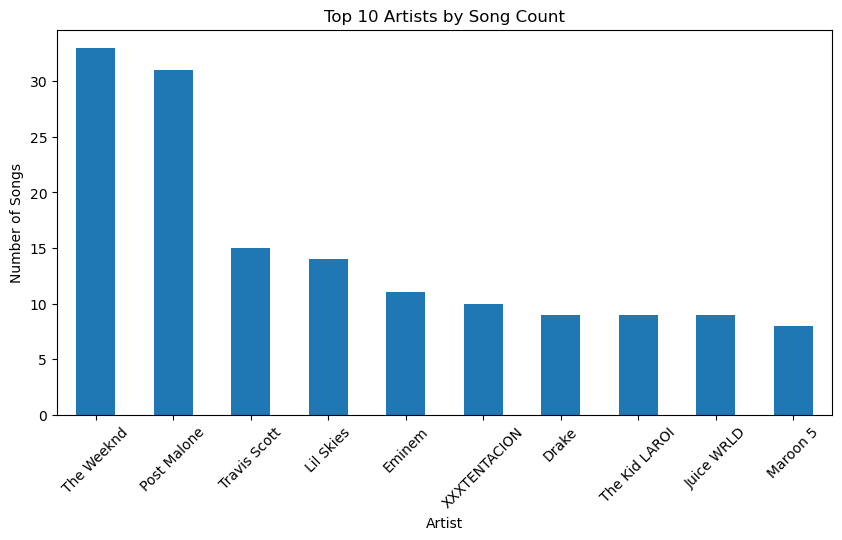

In [14]:
# Plot Top Artists
top_artists.plot(kind='bar', figsize=(10,5), title="Top 10 Artists by Song Count")
plt.ylabel("Number of Songs")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.show()

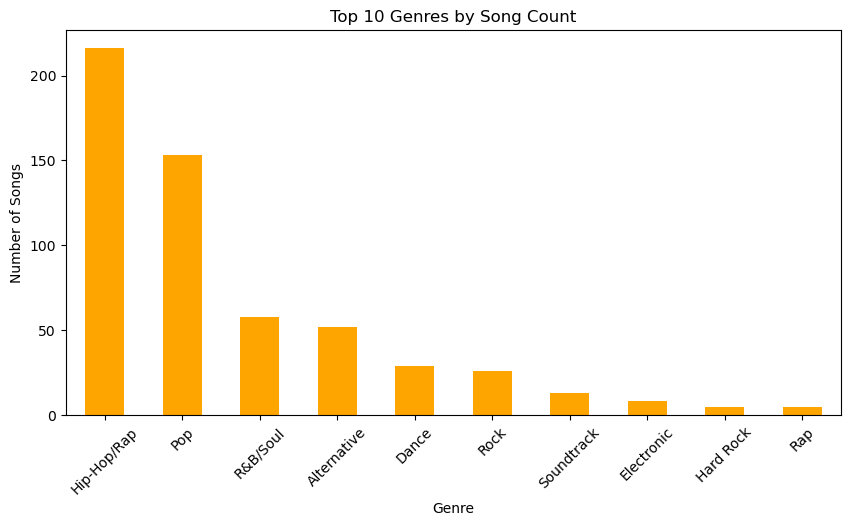

In [15]:
# Plot Top Genres
top_genres.plot(kind='bar', color="orange", figsize=(10,5), title="Top 10 Genres by Song Count")
plt.ylabel("Number of Songs")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

# ----------------------------------------
# 📈 Play Count Analysis
# ----------------------------------------

In [19]:
# Songs with the highest play count
most_played = df[['Name', 'Artist', 'Play Count']].sort_values(by="Play Count", ascending=False).head(10)
print("Top 10 Most Played Songs:")
print(most_played)

Top 10 Most Played Songs:
                              Name         Artist  Play Count
77                Name in the Sand      Lil Skies       149.0
168                        Circles    Post Malone       137.0
81            Welcome to the Rodeo      Lil Skies       125.0
182         Po'ed Up (feat. Gunna)  Paris Shadows       116.0
40                        YOSEMITE   Travis Scott       114.0
266                   In Your Eyes     The Weeknd       111.0
84                       Real Ties      Lil Skies       109.0
381  Gillette (feat. DrDisrespect)           199X       106.0
267                Save Your Tears     The Weeknd       103.0
187            HIGHEST IN THE ROOM   Travis Scott        94.0


In [46]:
# Songs with the lowest play count
most_played = df[['Name', 'Artist', 'Play Count']].dropna().sort_values(by="Play Count", ascending=False).tail(10)
print("Top 10 Least Played Songs:")
print(most_played)

Top 10 Least Played Songs:
                                          Name                      Artist  \
506  Another Day in Paradise (2016 Remastered)                Phil Collins   
186                                   She Wolf                     Shakira   
510                              Hold the Line                        Toto   
369                                   Hurt You  The Weeknd & Gesaffelstein   
488                                      Alone                   Liquideep   
479                              Faded (Cover)     Improver & Taras Stanin   
502                                  Your Love                The Outfield   
213                                  Nightmare                      Halsey   
487                               Sock It 2 Me     Da Brat & Missy Elliott   
188                        HIGHEST IN THE ROOM                Travis Scott   

     Play Count  
506         2.0  
186         2.0  
510         2.0  
369         2.0  
488         2.0  
479   



Distribution of how many times each song has been played in the library (in %):




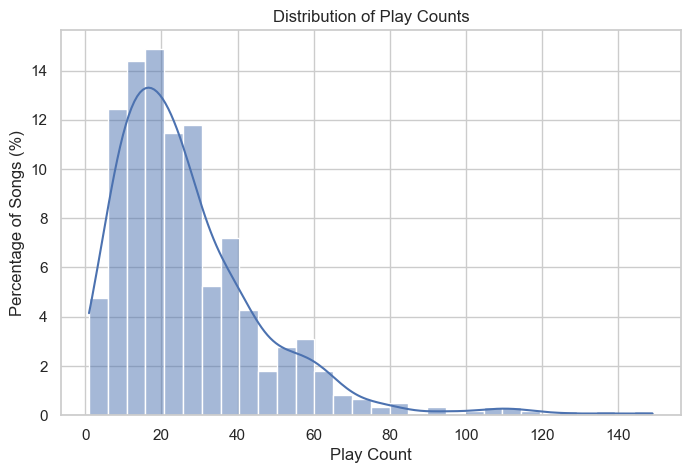

In [30]:
# Distribution of play counts
plt.figure(figsize=(8,5))

# Plot as percentage
sns.histplot(
    df['Play Count'].dropna(),
    bins=30,
    kde=True,
    stat="percent"   # <-- THIS is the important change
)

plt.title("Distribution of Play Counts")
plt.xlabel("Play Count")
plt.ylabel("Percentage of Songs (%)")   # <-- Update label

# Save before showing
plt.savefig("distribution_of_play_counts_apple_music.png")

print("\n\nDistribution of how many times each song has been played in the library (in %):\n\n")
plt.show()

# ----------------------------------------
# ⏳ Song Length Analysis
# ----------------------------------------

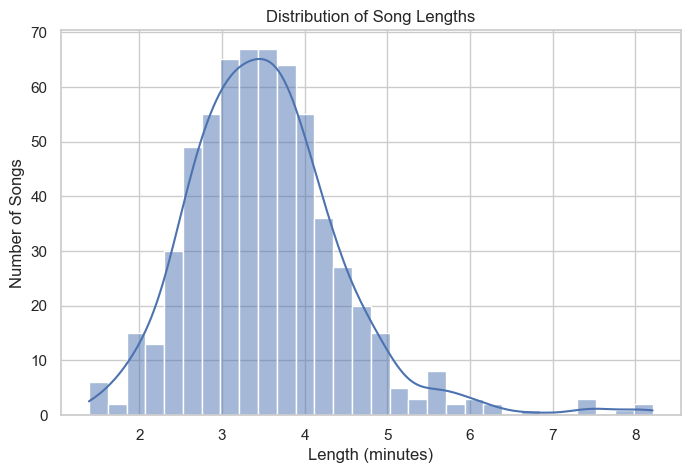

In [32]:
# Convert song time from milliseconds to minutes
df['Total Time (min)'] = df['Total Time (ms)'] / (1000 * 60)

# Distribution of song lengths
plt.figure(figsize=(8,5))
sns.histplot(df['Total Time (min)'].dropna(), bins=30, kde=True)
plt.title("Distribution of Song Lengths")
plt.xlabel("Length (minutes)")
plt.ylabel("Number of Songs")
plt.show()

# ----------------------------------------
# 🗓 Date Added Analysis
# ----------------------------------------

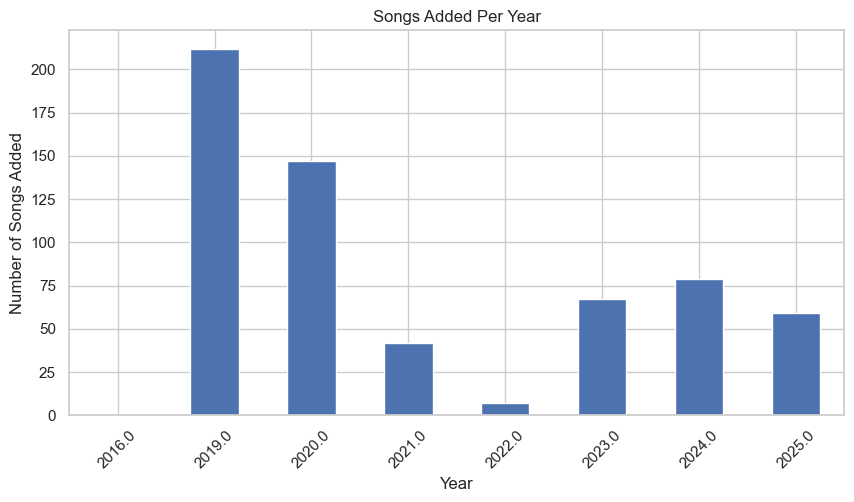

In [33]:
# Convert "Date Added" to datetime
df['Date Added'] = pd.to_datetime(df['Date Added'], errors='coerce')

# Songs added per year
df['Year Added'] = df['Date Added'].dt.year

songs_per_year = df['Year Added'].value_counts().sort_index()

songs_per_year.plot(kind='bar', figsize=(10,5), title="Songs Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs Added")
plt.xticks(rotation=45)
plt.show()

# ----------------------------------------
# 🎯 Skipped Songs Analysis
# ----------------------------------------

Top 10 Most Skipped Songs:
                                                            Name  \
380                                                   Hypnotized   
312  WHATS POPPIN (Remix) [feat. DaBaby, Tory Lanez & Lil Wayne]   
522                                               I'm Only Human   
456                                                     Sprinter   
101                                                When I'm Gone   
406                                                    Substance   
59                                                  Real Friends   
382                                                     Lovefool   
535                                            BIGMAN l Confused   
212                                                 Breezeblocks   

                                           Artist  Skip Count  
380  Purple Disco Machine & Sophie and the Giants        16.0  
312                                   Jack Harlow        14.0  
522                             

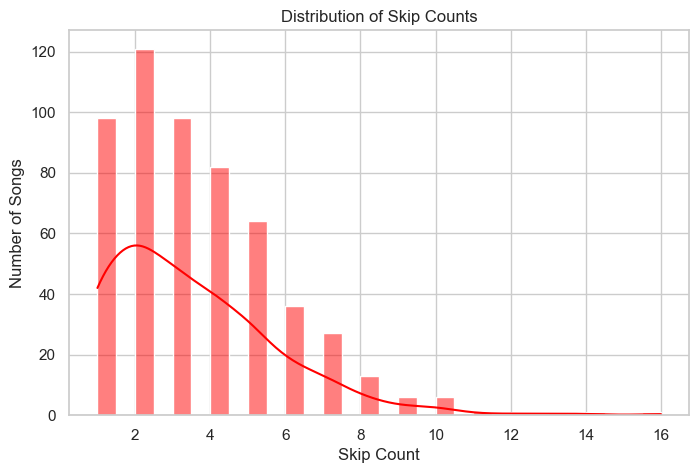

In [39]:
# Songs you skipped the most
most_skipped = df[['Name', 'Artist', 'Skip Count']].sort_values(by="Skip Count", ascending=False).head(10)
print("Top 10 Most Skipped Songs:")
print(most_skipped)

# Distribution of skip counts
plt.figure(figsize=(8,5))
sns.histplot(df['Skip Count'].dropna(), bins=30, kde=True, color="red")
plt.title("Distribution of Skip Counts")
plt.xlabel("Skip Count")
plt.ylabel("Number of Songs")
plt.show()